In [31]:
#importing necessary packages and libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#importing mnist dataset
#mnist dataset contains hand-written digit
dataset = tf.keras.datasets.mnist

In [5]:
#unpack the dataset to train and test
(x_train, y_train),(x_test, y_test) = dataset.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

(10000, 28, 28)

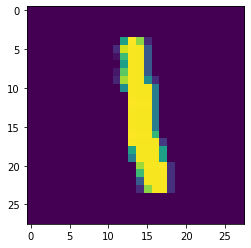

In [12]:
#showing image of one hand-written digit(seventh image in the list) from the training dataset
plt.imshow(x_train[6])
plt.show()


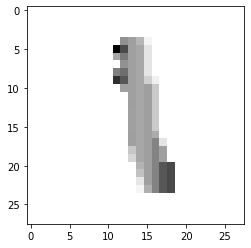

In [17]:
#showing image of one hand-written digit(seventh image in the list) from the training dataset
plt.imshow(x_train[6],cmap=plt.cm.binary)
plt.show()


In [15]:
#checking which digit does the image represent(seventh image in this case)
print(y_train[6])

1


In [16]:
#normalizing the dataset both for train and test
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [20]:
#build the model
model = tf.keras.models.Sequential()
#adding layers
model.add(tf.keras.layers.Flatten()) #this is input layer 
# next layer is a dense layer with 128 neurons/units and relu activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# next layer is also a dense layer with 128 neurons/units and relu activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#next layer is the output layer with 10 units since the dataset contains 10 classes(0-9) for classification
#activation function softmax since for probability distribution in the last layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [22]:
#add optimizer and loss function to the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
#train the model with the train_data with 4 epochs
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9828
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9867
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.9913


In [26]:
#saving the model
model.save('hand_written_digit_recognition.model')

INFO:tensorflow:Assets written to: hand_written_digit_recognition.model/assets


In [27]:
#load the pretrained model 'hand_written_digit_recognition.model'
new_model = tf.keras.models.load_model('hand_written_digit_recognition.model')


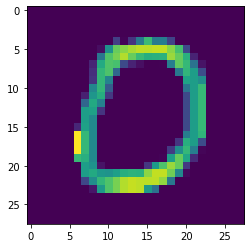

In [33]:
#first show an image from the test dataset #11th image
plt.imshow(x_test[10])
plt.show()

In [35]:
#predict using the new model
prediction = new_model.predict([x_test])
print(np.argmax(prediction[10]))

0


In [37]:
#evaluate the model 
(validation_loss, validation_accuracy) = new_model.evaluate(x_test, y_test)
print(validation_loss, validation_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0968 - accuracy: 0.9738
0.09681323915719986 0.973800003528595
